<a href="https://colab.research.google.com/github/shikharmay7/DiabeticRetinopathy/blob/master/DRGrading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import zipfile
from zipfile import ZipFile 
#to unzip the password protected training data uncomment the below code segment
"""fzip = ZipFile('/content/drive/My Drive/Datasets/regular-fundus-training.zip')
fzip.extractall(path='/content/drive/My Drive/Datasets/', members=None, pwd=b'isbi2020')"""

"fzip = ZipFile('/content/drive/My Drive/Datasets/regular-fundus-training.zip')\nfzip.extractall(path='/content/drive/My Drive/Datasets/', members=None, pwd=b'isbi2020')"

In [0]:
#instantiate the ZipFile class to access its extractall method
"""fzip2 = ZipFile('/content/drive/My Drive/Datasets/regular-fundus-validation.zip')
fzip2.extractall(path='/content/drive/My Drive/Datasets/', members=None, pwd=b'isbi2020')"""

"fzip2 = ZipFile('/content/drive/My Drive/Datasets/regular-fundus-validation.zip')\nfzip2.extractall(path='/content/drive/My Drive/Datasets/', members=None, pwd=b'isbi2020')"

In [0]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
train_df = pd.read_csv('/content/drive/My Drive/Datasets/regular-fundus-training/regular-fundus-training.csv')
val_df = pd.read_csv('/content/drive/My Drive/Datasets/regular-fundus-validation/regular-fundus-validation.csv')

In [0]:
#train_df.head(20)

In [0]:
train_df.describe

<bound method NDFrame.describe of       patient_id image_id  ... Field definition  Artifact
0              1     1_l1  ...                8         4
1              1     1_l2  ...                8         0
2              1     1_r1  ...                8         4
3              1     1_r2  ...                8         0
4              2     2_l1  ...                8         6
...          ...      ...  ...              ...       ...
1195         329   329_r2  ...               10         0
1196         330   330_l1  ...                8         0
1197         330   330_l2  ...                8         0
1198         330   330_r1  ...                8         0
1199         330   330_r2  ...                8         0

[1200 rows x 10 columns]>

In [0]:
print("training data shape: ", train_df.shape)
print("validation data shape: ", val_df.shape)

training data shape:  (1200, 10)
validation data shape:  (400, 10)


In [0]:
images = train_df['image_path']

In [0]:
#print(images)

In [0]:
print(images[0])

\regular-fundus-training\1\1_l1.jpg


In [0]:
print(train_df.shape[0])
image_id = train_df['image_id']
patient_id = train_df['patient_id']
image_path = train_df['image_path']
left_dr = train_df['left_eye_DR_Level']
right_dr = train_df['right_eye_DR_Level']
for i in range(10):
  print(i," ", patient_id[i] , " " , image_id[i] , " " , left_dr[i] , " " , right_dr[i])


1200
0   1   1_l1   0.0   nan
1   1   1_l2   0.0   nan
2   1   1_r1   nan   0.0
3   1   1_r2   nan   0.0
4   2   2_l1   2.0   nan
5   2   2_l2   2.0   nan
6   2   2_r1   nan   2.0
7   2   2_r2   nan   2.0
8   3   3_l1   1.0   nan
9   3   3_l2   1.0   nan


In [0]:
from PIL import Image
import os
images[0]


'\\regular-fundus-training\\1\\1_l1.jpg'

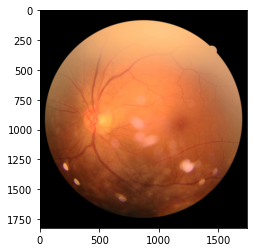

In [0]:

base_path = "\content\drive\My Drive\Datasets"

newPath = os.path.join(base_path, images[0])
newPath.replace('/','')
#print(newPath)
#print(newPath[32:],newPath[33])
img = Image.open('/content/drive/My Drive/Datasets/regular-fundus-training/1/1_l1.jpg')
img2 = Image.open('/content/drive/My Drive/Datasets/regular-fundus-training/1/1_l2.jpg')
plt.imshow(img)

(1824, 1736, 3)
(150528,)
(224, 224, 3)


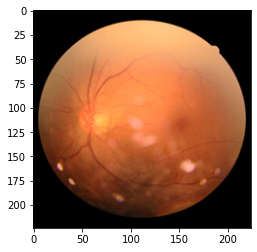

In [0]:
gray = img.convert('1')
#plt.imshow(gray)
val = np.array(img)
print(val.shape)
nim = img.resize((224,224))
newim = np.array(nim).flatten()
plt.imshow(nim)
mim = newim.reshape(224,224,3)
print(newim.shape)
print(mim.shape)

(1824, 1736)


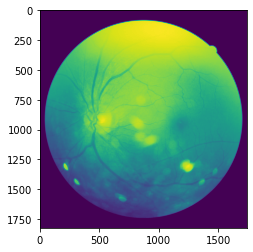

In [0]:
grad = img.convert('L')
plt.imshow(grad)
val2 = np.array(grad)
print(val2.shape)

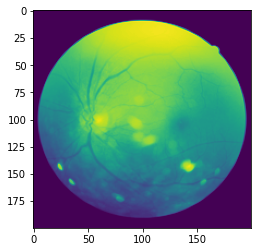

In [0]:
merge = grad.resize([200,200])
plt.imshow(merge)

In [0]:
print(train_df.shape[0])

1200


In [0]:
imMatrix = []
imLabel = []
img_rows = 224
img_cols = 224
for i in range(train_df.shape[0]):
  imgPath = "/content/drive/My Drive/Datasets/regular-fundus-training/"+str(patient_id[i])+"/" + str(image_id[i])+".jpg"
  im = Image.open(imgPath)   
  img = im.resize((img_rows,img_cols))
  #gray = img.convert('L')
  imMatrix.append(np.array(img).flatten())
  if(i%4==0 or i%4==1):
    imLabel.append(left_dr[i])
  else:
    imLabel.append(right_dr[i])


In [0]:
immatrix = np.asarray(imMatrix)
imlabel = np.asarray(imLabel)

In [0]:
print(immatrix)

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [0]:
from sklearn.utils import shuffle

data,Label = shuffle(immatrix,imlabel, random_state=2)
train_data = [data,Label]
type(train_data)

list

In [0]:
"""img=immatrix[0].reshape(img_rows,img_cols)
plt.imshow(img)
colormaps = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_sp']
plt.imshow(img,cmap='gray')"""

"img=immatrix[0].reshape(img_rows,img_cols)\nplt.imshow(img)\ncolormaps = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwa

In [0]:
#batch_size to train
batch_size = 32
# number of output classes
nb_classes = 5
# number of epochs to train
nb_epoch = 5

In [0]:
vimMatrix=[]
vimLabel=[]
vimage_id = val_df['image_id']
vpatient_id = val_df['patient_id']
vimage_path = val_df['image_path']
vleft_dr = val_df['left_eye_DR_Level']
vright_dr = val_df['right_eye_DR_Level']
for i in range(val_df.shape[0]):
  imgPath = "/content/drive/My Drive/Datasets/regular-fundus-validation/"+str(vpatient_id[i])+"/" + str(vimage_id[i])+".jpg"
  im = Image.open(imgPath)   
  img = im.resize((img_rows,img_cols))
  #gray = img.convert('L')
  vimMatrix.append(np.array(img).flatten())
  if(i%4==0 or i%4==1):
    vimLabel.append(left_dr[i])
  else:
    vimLabel.append(right_dr[i])

In [0]:
vimmatrix = np.asarray(vimMatrix)
vimlabel = np.asarray(vimLabel)

In [0]:
vdata,vLabel = shuffle(vimmatrix,vimlabel, random_state=2)
val_data = [vdata,vLabel]
type(val_data)

list

In [0]:
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

In [0]:
X_train = train_data[0]
y_train = train_data[1]

X_test = val_data[0]
y_test = val_data[1]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1200, 150528)
(1200,)
(400, 150528)
(400,)


In [0]:

#X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
#X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (1200, 224, 224, 3)
1200 train samples
400 test samples


label :  [0. 0. 1. 0. 0.]


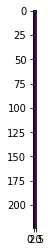

In [0]:
from keras.utils import np_utils

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

i = 100
plt.imshow(X_train[i, 0], interpolation='nearest')
print("label : ", Y_train[i,:])


In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from keras.models import Sequential
# from keras.layers.core import Dense, Dropout, Activation, Flatten
# from keras.layers.convolutional import Convolution2D, MaxPooling2D
# from keras.optimizers import SGD,RMSprop,adam
# from keras.layers import ZeroPadding2D

#model = Sequential()
"""
model.add(ZeroPadding2D((1,1),input_shape=(3,224,224)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1000, activation='softmax'))

model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))



optRms = tf.keras.optimizers.RMSprop(learning_rate=0.001)
optAdam = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optRms,
          loss='categorical_crossentropy',
          metrics=['accuracy'])"""


"\nmodel.add(ZeroPadding2D((1,1),input_shape=(3,224,224)))\nmodel.add(Convolution2D(64, 3, 3, activation='relu'))\nmodel.add(ZeroPadding2D((1,1)))\nmodel.add(Convolution2D(64, 3, 3, activation='relu'))\nmodel.add(MaxPooling2D((2,2), strides=(2,2)))\n\nmodel.add(ZeroPadding2D((1,1)))\nmodel.add(Convolution2D(128, 3, 3, activation='relu'))\nmodel.add(ZeroPadding2D((1,1)))\nmodel.add(Convolution2D(128, 3, 3, activation='relu'))\nmodel.add(MaxPooling2D((2,2), strides=(2,2)))\n\nmodel.add(ZeroPadding2D((1,1)))\nmodel.add(Convolution2D(256, 3, 3, activation='relu'))\nmodel.add(ZeroPadding2D((1,1)))\nmodel.add(Convolution2D(256, 3, 3, activation='relu'))\nmodel.add(ZeroPadding2D((1,1)))\nmodel.add(Convolution2D(256, 3, 3, activation='relu'))\nmodel.add(MaxPooling2D((2,2), strides=(2,2)))\n\nmodel.add(ZeroPadding2D((1,1)))\nmodel.add(Convolution2D(512, 3, 3, activation='relu'))\nmodel.add(ZeroPadding2D((1,1)))\nmodel.add(Convolution2D(512, 3, 3, activation='relu'))\nmodel.add(ZeroPadding2D((1,

In [0]:
def getPretrainedModel(model='vgg16'):
    IMG_SHAPE = (img_rows, img_cols, 3)
    if model=='resnet50':
        base_model = tf.keras.applications.ResNet50(input_shape=IMG_SHAPE,
                                                    include_top=False,
                                                    weights='imagenet')
    elif model=='vgg16':
        base_model = tf.keras.applications.VGG16(input_shape=IMG_SHAPE,
                                                    include_top=False,
                                                    weights='imagenet')
    elif model=='vgg19':
        base_model = tf.keras.applications.VGG19(input_shape = IMG_SHAPE,
                                               include_top = False,
                                               weights = 'imagenet')
    
    elif model=='mobileNet':
        base_model = tf.keras.applications.MobileNet(input_shape = IMG_SHAPE,
                                                     include_top = False,
                                                     weights = 'imagenet')    

    elif model=='inceptionV3':
        base_model = tf.keras.applications.InceptionV3(input_shape=IMG_SHAPE,
                                                    include_top=False,
                                                    weights='imagenet')    
    elif model=='DenseNet121':
        base_model = tf.keras.applications.DenseNet121(input_shape=IMG_SHAPE,
                                                    include_top=False,
                                                    weights='imagenet')
    base_model.trainable = False
    return base_model

In [0]:
def createModel():
    model = Sequential([
        Flatten(),
        Dense(512, activation='relu'),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'), 
        Dense(5, activation='softmax') 
    ])
    return model

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# create generators  - training data will be augmented images
validationdatagenerator = ImageDataGenerator()
traindatagenerator = ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,rotation_range=15,zoom_range=0.1 )

batchsize=16
train_generator=traindatagenerator.flow(X_train, Y_train, batch_size=batchsize) 
validation_generator=validationdatagenerator.flow(X_test, Y_test,batch_size=batchsize)


In [0]:
base_model = getPretrainedModel('vgg16')
classifier_model = createModel()
# model = Sequential()
# model.add(base_model)
# model.add(classifier_model)
model = tf.keras.Sequential([
    base_model,
    classifier_model
])

optRms = tf.keras.optimizers.RMSprop(learning_rate=0.001)

optAdam = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optRms,
          loss='categorical_crossentropy',
          metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
sequential_6 (Sequential)    (None, 5)                 13018373  
Total params: 27,733,061
Trainable params: 13,018,373
Non-trainable params: 14,714,688
_________________________________________________________________


In [88]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch=int(len(X_train)/batchsize),
                              epochs=20, 
                              validation_data=validation_generator,
                              validation_steps=int(len(X_test)/batchsize),
                              shuffle=True)

Epoch 1/20
75/75 [==============================] - 795s 11s/step - loss: 1.9771 - accuracy: 0.3808 - val_loss: 1.4894 - val_accuracy: 0.4400
Epoch 2/20
75/75 [==============================] - 799s 11s/step - loss: 1.4324 - accuracy: 0.4292 - val_loss: 1.4849 - val_accuracy: 0.3950
Epoch 3/20
75/75 [==============================] - 797s 11s/step - loss: 1.3651 - accuracy: 0.4317 - val_loss: 1.5141 - val_accuracy: 0.3425
Epoch 4/20
75/75 [==============================] - 795s 11s/step - loss: 1.3107 - accuracy: 0.4633 - val_loss: 1.6824 - val_accuracy: 0.4475
Epoch 5/20
75/75 [==============================] - 797s 11s/step - loss: 1.2721 - accuracy: 0.4733 - val_loss: 1.5171 - val_accuracy: 0.3925
Epoch 6/20
75/75 [==============================] - 796s 11s/step - loss: 1.2288 - accuracy: 0.5017 - val_loss: 1.6094 - val_accuracy: 0.3575
Epoch 7/20
75/75 [==============================] - 796s 11s/step - loss: 1.2215 - accuracy: 0.5108 - val_loss: 1.7439 - val_accuracy: 0.4225
Epoch 

13/13 [==============================] - 181s 14s/step - loss: 2.4709 - accuracy: 0.4175
[2.470916271209717, 0.41749998927116394]


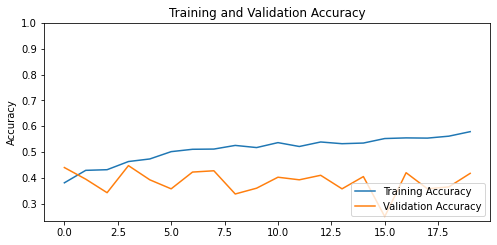

In [89]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
score = model.evaluate(X_test, Y_test, verbose=1)
print(score)

In [0]:
print(grayscale_batch.shape)  # (64, 224, 224)
rgb_batch = np.repeat(grayscale_batch[..., np.newaxis], 3, -1)
print(rgb_batch.shape)  # (64, 224, 224, 3)